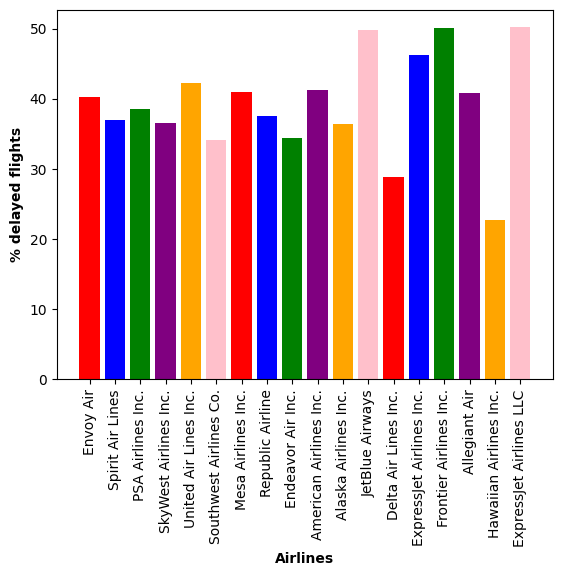

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import csv

df = pd.read_csv("delays_2019.csv")
# df.head()
df = df.dropna()

# df[['carrier_ct','weather_ct','nas_ct','security_ct','late_aircraft_ct']] = df[['carrier_ct','weather_ct','nas_ct','security_ct','late_aircraft_ct']].round(0)

# df[['carrier_ct','weather_ct','nas_ct','security_ct','late_aircraft_ct','arr_flights','arr_del15','arr_cancelled','arr_delay','carrier_delay','weather_delay','nas_delay','security_delay','late_aircraft_delay']] = df[['carrier_ct','weather_ct','nas_ct','security_ct','late_aircraft_ct','arr_flights','arr_del15','arr_cancelled','arr_delay','carrier_delay','weather_delay','nas_delay','security_delay','late_aircraft_delay']].round(0).astype(int)

# df=df.drop('arr_diverted',axis=1)
# df=df.drop('security_ct',axis=1)
# df=df.drop('security_delay',axis=1)


df['total_delayed_flights'] = df['arr_del15']+df['carrier_ct'] + \
    df['weather_ct']+df['nas_ct']+df['late_aircraft_ct']
df.to_csv('delays_2019.csv', index=False)
df.head()

dict_airlines = {}
total_arriving_flights = {}
with open('delays_2019.csv', 'r') as csvfile:
    csvreader = csv.reader(csvfile)
    count = 0
    for row in csvreader:
        #         removing 1st line
        if not count:
            count += 1
            continue

        if row[2] not in dict_airlines:
            dict_airlines[row[2]] = int(row[17])
        else:
            dict_airlines[row[2]] += int(row[17])

        if row[2] not in total_arriving_flights:
            total_arriving_flights[row[2]] = int(row[5])
        else:
            total_arriving_flights[row[2]] += int(row[5])

# print(dict_airlines.values())
# print()
# print(total_arriving_flights.values())


kamo_data = np.array(list(dict_airlines.values())) / \
    np.array(list(total_arriving_flights.values()))*100
color = ['red', 'blue', 'green', 'purple', 'orange', 'pink']
plt.bar(dict_airlines.keys(), kamo_data, color=color)
plt.xticks(rotation=90)
plt.xlabel("Airlines", fontweight='bold')
plt.ylabel("% delayed flights", fontweight='bold')
plt.show()


airports_delay = {}
airports_arriving = {}

with open('delays_2019.csv', 'r') as csvfile:
    csvreader = csv.reader(csvfile)
    count = 0
    for row in csvreader:
        #         removing 1st line
        if not count:
            count += 1
            continue

        if row[3] not in airports_delay:
            airports_delay[row[3]] = int(row[17])
        else:
            airports_delay[row[3]] += int(row[17])

        if row[3] not in airports_arriving:
            airports_arriving[row[3]] = int(row[5])
        else:
            airports_arriving[row[3]] += int(row[5])

namo_data = np.array(list(airports_delay.values())) / \
    np.array(list(airports_arriving.values()))*100
color = ['red', 'blue', 'green', 'purple', 'orange', 'pink']


[21, 49, 31, 30, 79, 40, 37, 54, 42, 254]
[395026, 339569, 304346, 252064, 235490, 219996, 179682, 175343, 171665, 170966]
['ATL', 'ORD', 'DFW', 'DEN', 'CLT', 'LAX', 'IAH', 'PHX', 'LGA', 'SFO']
[28.157133960802582, 43.60174220850549, 39.55300874662391, 38.67232131522153, 31.722790776678416, 36.77975963199331, 40.3562961231509, 34.13081788266427, 52.251769434654705, 50.63755366564112]


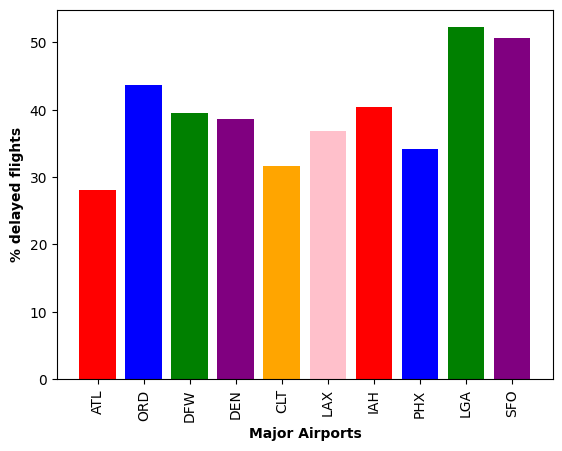

In [8]:
# print(airports_arriving)
airports = airports_arriving.values()
tempo = list(airports_arriving.keys())
major_airports_arr = sorted(
    enumerate(airports), key=lambda x: x[1], reverse=True)[:10]

index1 = []
temp1 = []
for i, value in major_airports_arr:
    index1.append(i)
    temp1.append(value)
major_airports_arr = temp1

print(index1)
print(major_airports_arr)

major_airports = [tempo[i] for i in index1]
print(major_airports)
major_airport_propo = [namo_data[i] for i in index1]
print(major_airport_propo)
plt.bar(major_airports, major_airport_propo, color=color)
plt.xticks(rotation=90)
plt.xlabel("Major Airports", fontweight='bold')
plt.ylabel("% delayed flights", fontweight='bold')
plt.show()
